## Daily Show Guests


- starting time: 09:10

#### Occupation shift in the show (i.e. from actor -> politicians over year)
- small multiple of histogram chart/line
- standard line chart highlighting the specific occupation in red
- stream chart / stacked area chart (w/ abs number or w/ %) (d3.js)

#### Seasonality of occupation (i.e. politician come in winter)
- four seasons: bar chart?
- 12 months: bar chart (w/ start and end repeatition)

#### Timing of different occupation (i.e. politician come when election is near?)
- Bar chart of US election vs. Non-US election

#### Number of guests over years (i.e. more guests over year)
- ~~line chart~~

#### Most common guest on the show 
- ~~sort table~~

#### Most common occupation on the show
- ~~sort table~~

#### What occupation have the highest chance to get on the show ( i.e.  actotrs on the show / total actiors)
- link to the distribution of occupation of US


In [1]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.library['fivethirtyeight']['axes.prop_cycle']



'#30a2da'
'#fc4f30'
'#e5ae38'
'#6d904f'
'#8b8b8b'


In [2]:
from IPython.core.display import display, HTML
from string import Template
import json


In [3]:
guests = pd.read_csv("./data/data/daily-show-guests/daily_show_guests.csv")
guests.head()


,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [4]:
most_frequent = guests.pivot_table(index='Raw_Guest_List', aggfunc=np.count_nonzero).sort_values(by='Show', ascending=False)
most_frequent = most_frequent['GoogleKnowlege_Occupation']
most_frequent.head()

Raw_Guest_List
Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Paul Rudd         13
Ricky Gervais     13
Name: GoogleKnowlege_Occupation, dtype: int64

In [5]:
most_frequent = guests.pivot_table(index='Group', aggfunc=np.count_nonzero).sort_values(by='Show', ascending=False)
most_frequent = most_frequent['GoogleKnowlege_Occupation']
most_frequent

Group
Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Academic          103
Athletics          52
Misc               45
Government         40
Political Aide     36
Science            28
Business           25
Advocacy           24
Consultant         18
Military           16
Clergy              8
media               5
Name: GoogleKnowlege_Occupation, dtype: int64

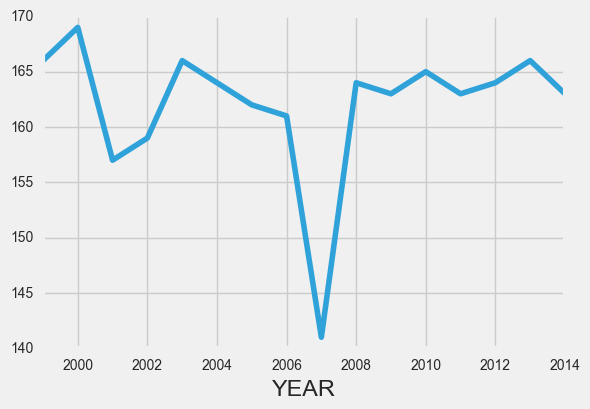

In [42]:
number_guests = guests.pivot_table(index='YEAR', values='Raw_Guest_List', aggfunc=np.count_nonzero)
number_guests = number_guests.drop(2015)
sns.tsplot(number_guests, time=number_guests.index)


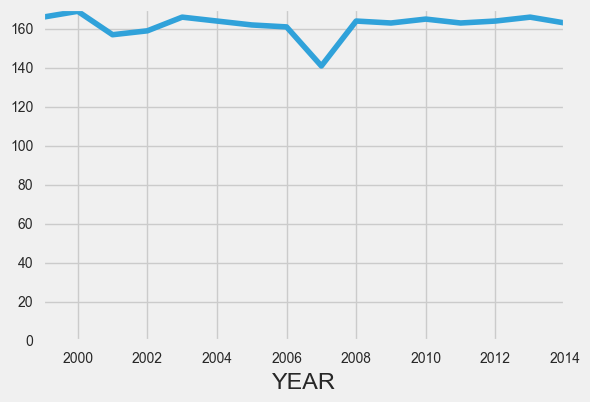

In [7]:
plt.ylim(0, 170)
sns.tsplot(number_guests, time=number_guests.index)

In [44]:
guests_per_group = guests.pivot_table(index=['YEAR', 'Group'], values='Raw_Guest_List', aggfunc=np.count_nonzero)
guests_per_group = guests_per_group.reset_index()
guests_per_group.head()



,YEAR,Group,Raw_Guest_List
0,1999,Acting,108
1,1999,Comedy,25
2,1999,Media,11
3,1999,Musician,17
4,1999,Politician,2


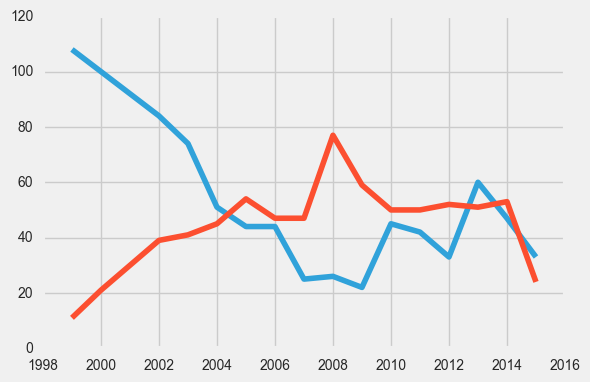

In [48]:
Acting = guests_per_group[guests_per_group['Group'] == 'Acting']
Media = guests_per_group[guests_per_group['Group'] == 'Media']

plt.plot(Acting['YEAR'], Acting['Raw_Guest_List'], Media['YEAR'], Media['Raw_Guest_List'])


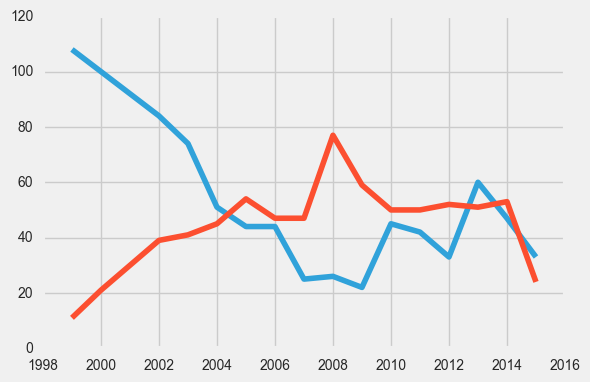

In [52]:
plt.plot(Acting['YEAR'], Acting['Raw_Guest_List'])
plt.plot(Media['YEAR'], Media['Raw_Guest_List'])

In [9]:
guests_per_group

0      1999
5      2000
15     2001
25     2002
38     2003
50     2004
64     2005
78     2006
92     2007
108    2008
122    2009
138    2010
153    2011
169    2012
184    2013
198    2014
212    2015
Name: YEAR, dtype: int64

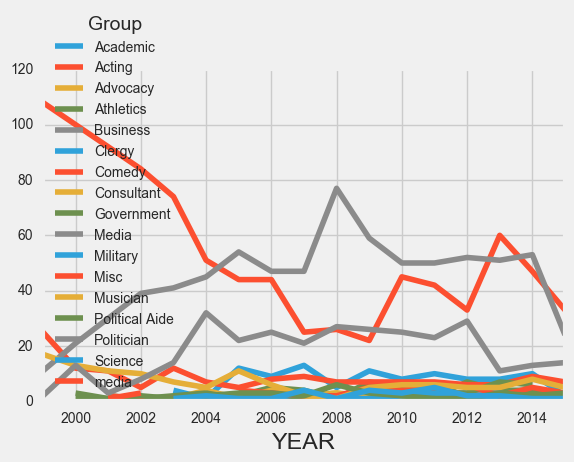

In [56]:
guests_per_group_hor = guests.pivot_table(index='YEAR', columns='Group', values='Raw_Guest_List', aggfunc=np.count_nonzero)
guests_per_group_hor.plot()





Academic


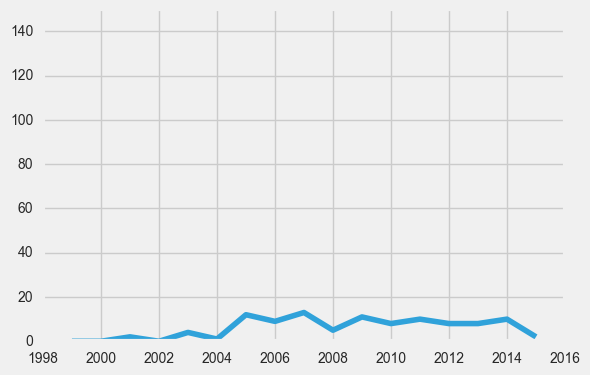

Acting


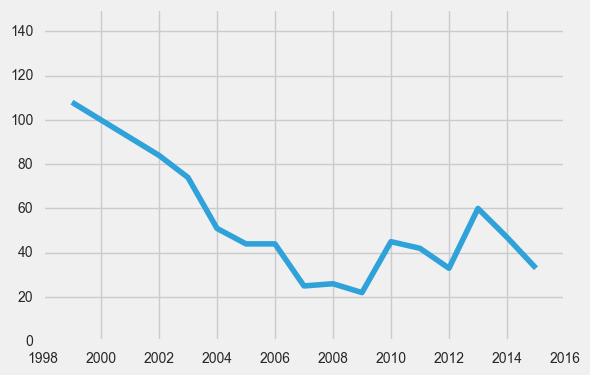

Advocacy


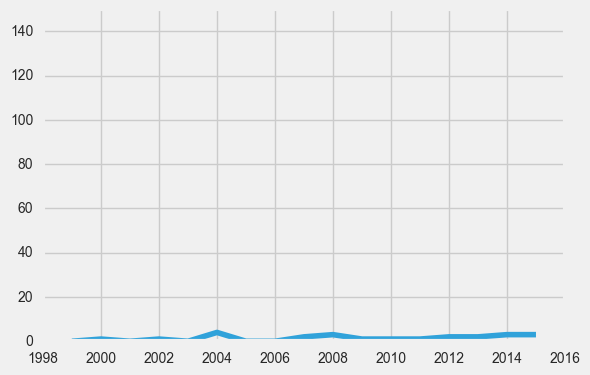

Athletics


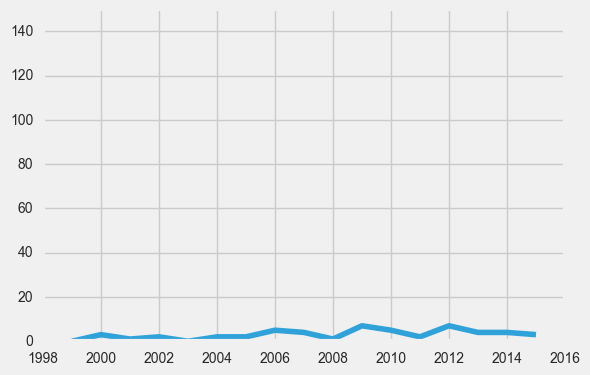

Business


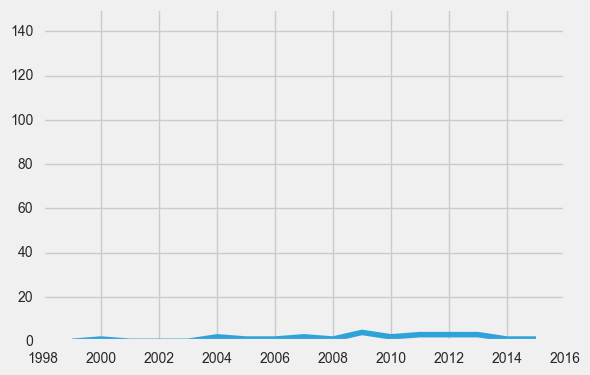

Clergy


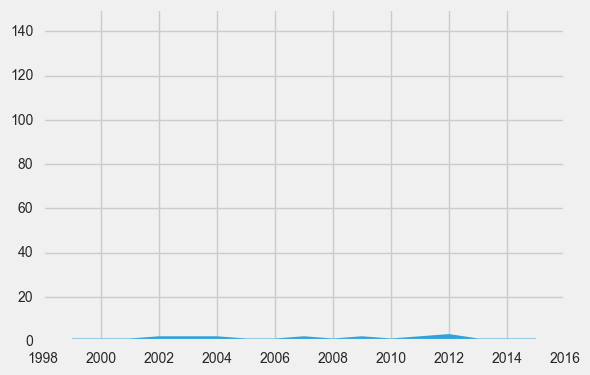

Comedy


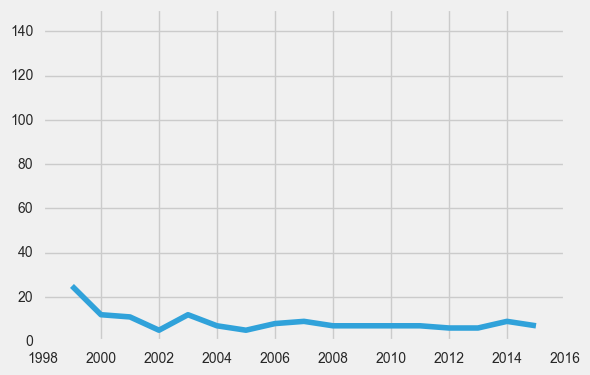

Consultant


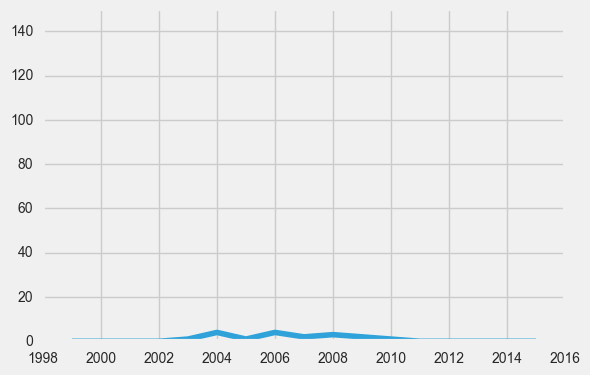

Government


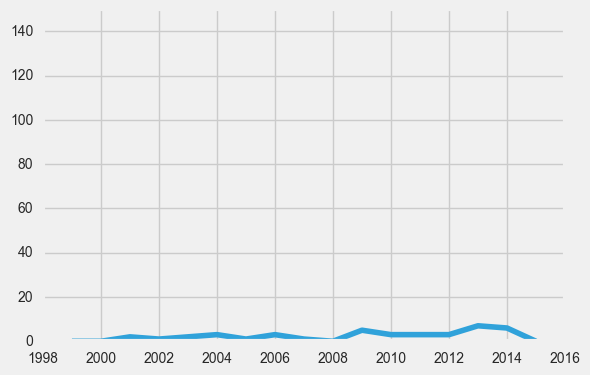

Media


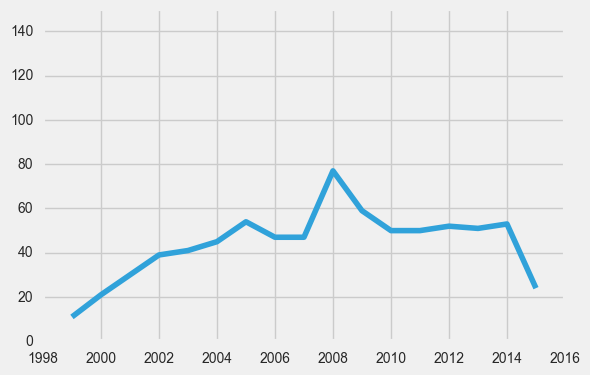

Military


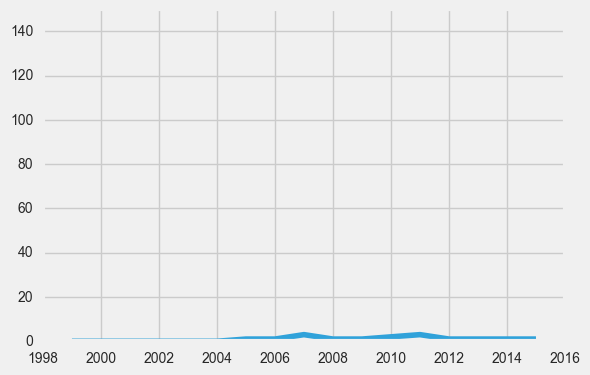

Misc


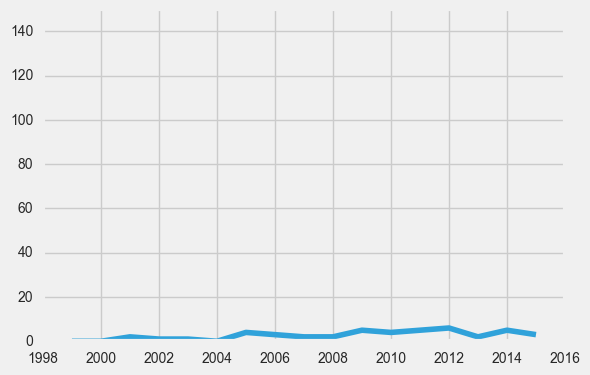

Musician


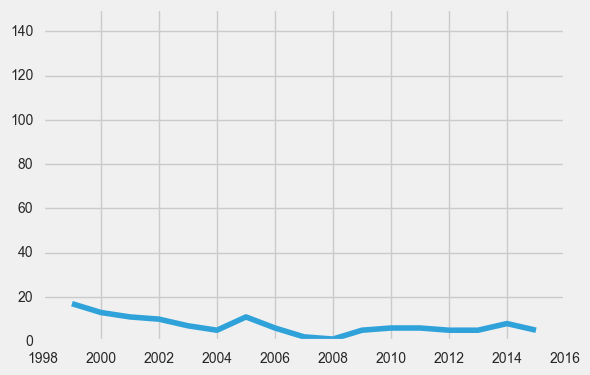

Political Aide


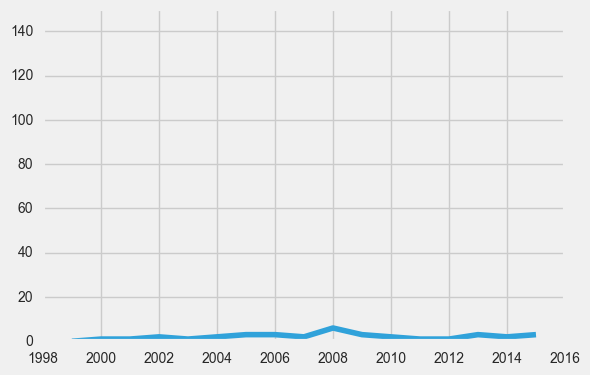

Politician


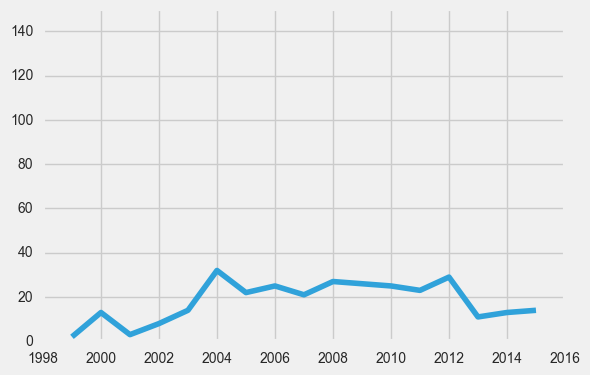

Science


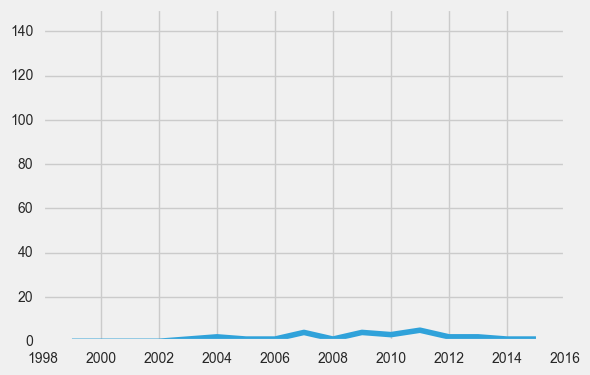

media


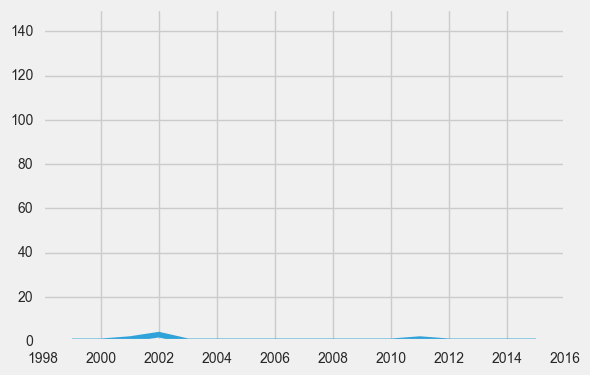

In [101]:
guests_per_group_hor = guests.pivot_table(index='YEAR', columns='Group', values='Raw_Guest_List', aggfunc=np.count_nonzero).fillna(0)


for col in guests_per_group_hor.columns: 
    group = guests_per_group_hor[col]
    print(col)
    plt.ylim(0, 150)
    plt.plot(group.index, group.values)
    plt.show()

